In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('eeg_readings.csv')

In [3]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,y
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1),df['y'], test_size=0.33, random_state=101)

In [7]:
from sklearn.svm import LinearSVC

In [9]:
clf = LinearSVC()

In [10]:
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
predictions = clf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test,predictions))

[[2729    0]
 [2198   17]]


In [17]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.54      1.00      0.70      2642
          1       0.91      0.01      0.02      2302

avg / total       0.71      0.54      0.38      4944



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
scalar=StandardScaler()

In [20]:
scalar.fit(df.drop('y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_features = scalar.transform(df.drop('y',axis=1))

In [24]:
df_scaled=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [25]:
df_scaled.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.002934,-0.011704,0.567398,-0.003209,0.245236,-0.019788,-0.002930,0.852568,0.001509,0.187750,0.233510,0.030745,0.017127,-0.003834
1,0.001084,-0.112052,0.671390,-0.003111,0.008893,-0.019610,-0.002817,0.782241,-0.003771,-0.122109,0.138498,0.006192,0.014578,-0.005489
2,0.002316,-0.067429,0.705829,-0.001636,-0.138785,-0.020663,-0.002930,0.484886,-0.005213,-0.243529,0.111503,0.067815,0.011185,-0.004618
3,0.002730,0.044020,0.729013,-0.001734,0.053225,-0.021015,-0.002817,0.502297,-0.000649,0.106803,0.220012,0.203578,0.014156,-0.003399
4,0.001698,0.044020,0.636726,-0.002620,0.171253,-0.019610,-0.003152,0.397148,-0.003771,0.335977,0.274267,0.216095,0.014578,-0.003051


In [27]:
clfK=KNeighborsClassifier(n_neighbors=1)

In [28]:
clfK.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
clfKPred =clf.predict(X_test)

In [30]:
print(confusion_matrix(y_test,clfKPred))

[[2729    0]
 [2198   17]]


In [31]:
print(classification_report(y_test,clfKPred))

             precision    recall  f1-score   support

          0       0.55      1.00      0.71      2729
          1       1.00      0.01      0.02      2215

avg / total       0.75      0.56      0.40      4944



In [47]:
y_test.iloc[1:].value_counts()

0    2728
1    2215
Name: y, dtype: int64

In [68]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=3)

In [92]:
pca.fit(scaled_features)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
x_pca=pca.transform(scaled_features)

In [94]:
scaled_features.shape

(14980, 14)

In [95]:
x_pca.shape

(14980, 3)

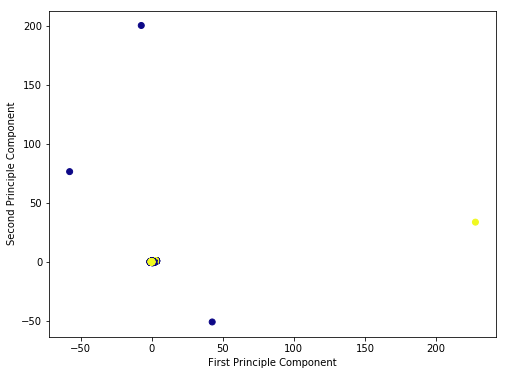

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['y'],cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

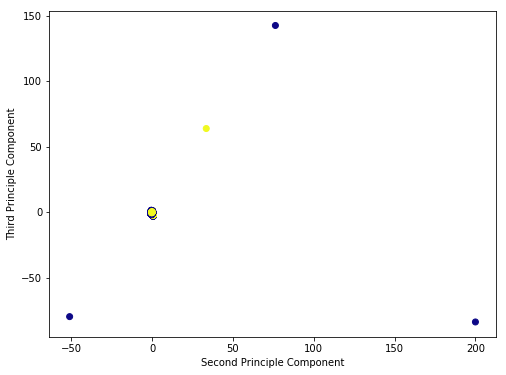

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2],c=df['y'],cmap='plasma')
plt.xlabel('Second Principle Component')
plt.ylabel('Third Principle Component')

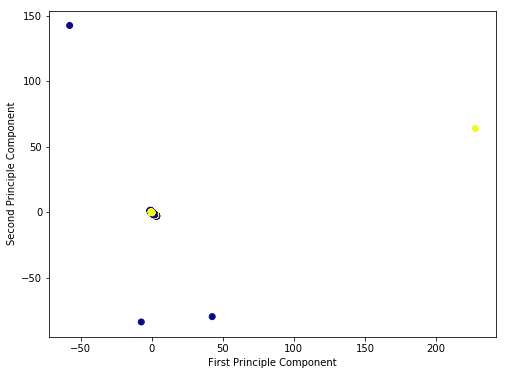

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=df['y'],cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [101]:
df_names =df.dtypes.index


In [102]:
df_names


Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'y'],
      dtype='object')

In [103]:
df_names1 = df_names[:-1]

In [104]:
df_names1

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4'],
      dtype='object')

In [105]:
df_comp = pd.DataFrame(pca.components_,columns=df_names1)

In [106]:
df_comp

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.453789,0.239255,0.371910,-0.013808,0.067762,-0.116458,-0.016762,0.108782,0.456464,0.023452,0.364103,-0.061746,0.457541,-0.115842
1,0.089798,-0.181363,-0.265239,0.488877,0.423398,0.191674,0.489190,0.034398,0.085301,-0.232448,0.206714,0.117639,0.076848,0.263462
2,0.192495,-0.127854,-0.216345,-0.248444,0.171909,0.422429,-0.247955,-0.182683,0.181775,0.105398,-0.228994,-0.511354,0.183127,0.378957


In [107]:
plt.figure(figsize=(12,6))

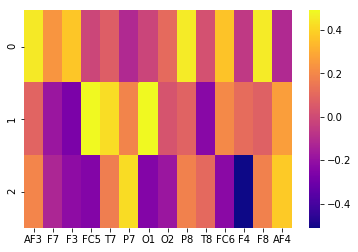

In [108]:
sns.heatmap(df_comp,cmap='plasma')

In [ ]:
#so looking at this if I did AF3, FC5,T7,P7,P8,FC6,F8, AF4 i might get
#better differentiation

In [ ]:
#so create a dataframe with just these

In [110]:
edited_dataframe= df_scaled.drop(['F7','O2','T8','F4'],axis=1)

In [111]:
edited_dataframe.head()

,AF3,F3,FC5,T7,P7,O1,P8,FC6,F8,AF4
0,0.002934,0.567398,-0.003209,0.245236,-0.019788,-0.002930,0.001509,0.233510,0.017127,-0.003834
1,0.001084,0.671390,-0.003111,0.008893,-0.019610,-0.002817,-0.003771,0.138498,0.014578,-0.005489
2,0.002316,0.705829,-0.001636,-0.138785,-0.020663,-0.002930,-0.005213,0.111503,0.011185,-0.004618
3,0.002730,0.729013,-0.001734,0.053225,-0.021015,-0.002817,-0.000649,0.220012,0.014156,-0.003399
4,0.001698,0.636726,-0.002620,0.171253,-0.019610,-0.003152,-0.003771,0.274267,0.014578,-0.003051


In [114]:
edited_dataframe.count()

AF3    14980
F3     14980
FC5    14980
T7     14980
P7     14980
O1     14980
P8     14980
FC6    14980
F8     14980
AF4    14980
dtype: int64

In [118]:
clfKbetter=KNeighborsClassifier(n_neighbors=1)

In [119]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(edited_dataframe,df['y'], test_size=0.33, random_state=42)

In [120]:
clfKbetter.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [121]:
Kbpred=clfKbetter.predict(X_test1)

In [122]:
print(confusion_matrix(y_test1,Kbpred))

[[1756  886]
 [1097 1205]]


In [123]:
print(classification_report(y_test1,Kbpred))

             precision    recall  f1-score   support

          0       0.62      0.66      0.64      2642
          1       0.58      0.52      0.55      2302

avg / total       0.60      0.60      0.60      4944



In [124]:
#This is getting better. Still looks like the dominant features not fully identified

In [126]:
edited_dataframe2= edited_dataframe= df_scaled.drop(['F7','F3','T7','P7','O2','T8','F4','FC6','AF4'],axis=1)

In [127]:
edited_dataframe2.head()

,AF3,FC5,O1,P8,F8
0,0.002934,-0.003209,-0.002930,0.001509,0.017127
1,0.001084,-0.003111,-0.002817,-0.003771,0.014578
2,0.002316,-0.001636,-0.002930,-0.005213,0.011185
3,0.002730,-0.001734,-0.002817,-0.000649,0.014156
4,0.001698,-0.002620,-0.003152,-0.003771,0.014578


In [128]:
clfKbetter2=KNeighborsClassifier(n_neighbors=1)

In [129]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(edited_dataframe2,df['y'], test_size=0.33, random_state=42)

In [130]:
clfKbetter2.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [131]:
Kbpred2=clfKbetter2.predict(X_test2)

In [132]:
print(confusion_matrix(y_test1,Kbpred))

[[1756  886]
 [1097 1205]]


In [133]:
print(confusion_matrix(y_test2,Kbpred2))

[[2057  585]
 [ 717 1585]]


In [134]:
print(classification_report(y_test2,Kbpred2))                                                                                                                 

             precision    recall  f1-score   support

          0       0.74      0.78      0.76      2642
          1       0.73      0.69      0.71      2302

avg / total       0.74      0.74      0.74      4944

